### Local Setup

In [1]:
from pathlib import Path
import sys

# Make this path be the project's "base" directory, so we can include modules
notebook_directory_ancestor = Path.cwd().resolve().parent.parent.parent.parent
print(notebook_directory_ancestor)
core_code_directory = notebook_directory_ancestor / "PythonLibraries" / "CoreCode"

is_core_code_directory_in_sys_path = str(core_code_directory) in sys.path
is_notebook_directory_ancestor_in_sys_path = str(notebook_directory_ancestor) in sys.path
print("Is CoreCode directory in sys.path?", is_core_code_directory_in_sys_path)
print("Is notebook directory's ancestor in sys.path?", is_notebook_directory_ancestor_in_sys_path)

if not is_core_code_directory_in_sys_path:
    sys.path.append(str(core_code_directory))
    
from corecode.Utilities import (
    DataSubdirectories,
    )
data_sub_dirs = DataSubdirectories()


/InServiceOfX
Is CoreCode directory in sys.path? False
Is notebook directory's ancestor in sys.path? False


# IP-Adapter

## General tasks

In [2]:
from diffusers import AutoPipelineForText2Image
from diffusers.utils import load_image
import torch

example_model_subdir = data_sub_dirs.ModelsDiffusion / "stabilityai" / "stable-diffusion-xl-base-1.0"

In [ ]:
pipeline = AutoPipelineForText2Image.from_pretrained(example_model_subdir, torch_dtype=torch.float16)

In [3]:
#pipeline = pipeline.to("cuda")

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 7.79 GiB of which 27.56 MiB is free. Process 21200 has 6.91 GiB memory in use. Of the allocated memory 6.56 GiB is allocated by PyTorch, and 222.33 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [3]:
pipeline = AutoPipelineForText2Image.from_pretrained(example_model_subdir, torch_dtype=torch.float16)
pipeline.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  tokenizer
{}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  vae
{'torch_dtype': torch.float16, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  tokenizer_2
{}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  scheduler
{}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  unet
{'torch_dtype': torch.float16, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/stabilityai/stable-diffusion-xl-base-1.0
name:  text_encoder_2
{'torch_dtype': torch.float16, 'device_map': None, 'max_memory': None, 'offlo

In [4]:
example_ip_adapter = data_sub_dirs.ModelsDiffusion / "h94" / "IP-Adapter"

In [ ]:
pipeline.load_ip_adapter(example_ip_adapter, subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin")

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:836: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


## Specific use cases

### Face model

Diffusers supports 2 IP-Adapter checkpoints specifically trained to generate faces from the [h94/IP-Adapter](https://huggingface.co/h94/IP-Adapter) repository:
* [ip-adapter-full-face_sd15.safetensors](https://huggingface.co/h94/IP-Adapter/blob/main/models/ip-adapter-full-face_sd15.safetensors) is conditioned with images of cropped faces and removed backgrounds

For face models, use [h84/IP-Adapter](https://huggingface.co/h94/IP-Adapter) checkpoint. It's also recommended to use [DDIMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/ddim#diffusers.DDIMScheduler) or [EulerDiscreteScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/euler#diffusers.EulerDiscreteScheduler) for face models.

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

In [3]:
example_model_subdir = data_sub_dirs.ModelsDiffusion / "runwayml" / "stable-diffusion-v1-5"
example_ip_adapter_subdir = data_sub_dirs.ModelsDiffusion / "h94" / "IP-Adapter"

In [4]:
pipeline = StableDiffusionPipeline.from_pretrained(example_model_subdir)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  feature_extractor
{}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  unet
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  safety_checker
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  scheduler
{}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  vae
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  text_encoder
{'torch

In [5]:
pipeline.enable_model_cpu_offload()

In [6]:
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter(
    example_ip_adapter_subdir,
    subfolder="models",
    weight_name="ip-adapter-full-face_sd15.bin")
pipeline.set_ip_adapter_scale(0.5)

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:836: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
image0=load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_einstein_base.png")

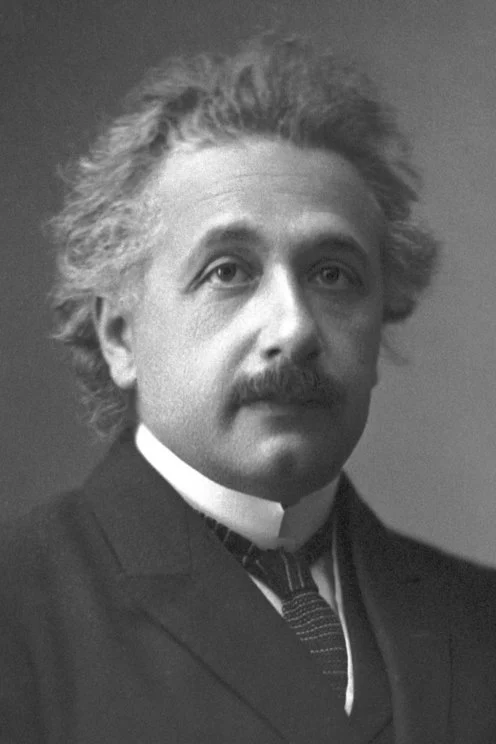

In [8]:
image0

In [9]:
generator = torch.Generator(device="cpu").manual_seed(26)

In [10]:
example_prompt="A photo of Einstein as a chef, wearing an apron, cooking in a French restaurant"
example_negative_prompt="lowres, bad anatomy, worst quality, low quality"

In [11]:
pipeline.enable_sequential_cpu_offload()

In [12]:
image = pipeline(
    prompt=example_prompt,
    ip_adapter_image=image,
    negative_prompt=example_negative_prompt,
    num_inference_steps=100,
    generator=generator).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

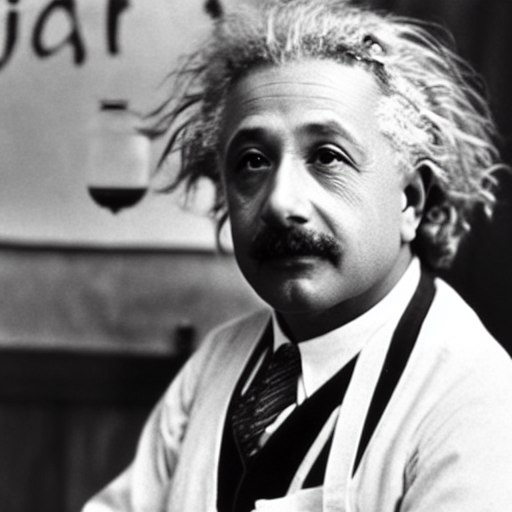

In [13]:
image

In [15]:
import gc

gc.collect()
if torch.cuda.is_available():
    with torch.cuda.device("cuda"):
        torch.cuda.empty_cache()
        torch.cuda.ipc_collect()

#### Using Stable Diffusion XL based models

In [2]:
import torch
from diffusers import StableDiffusionXLPipeline, DDIMScheduler, EulerDiscreteScheduler
from diffusers.utils import load_image

In [3]:
example_model_subdir = data_sub_dirs.ModelsDiffusion / "fluently" / "Fluently-XL-v4-modded"
example_ip_adapter_subdir = data_sub_dirs.ModelsDiffusion / "h94" / "IP-Adapter"

In [4]:
pipeline = StableDiffusionXLPipeline.from_pretrained(
    example_model_subdir,
    local_files_only=True,
    add_watermaker=False,
    use_safetensors=True)

Keyword arguments {'add_watermaker': False} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4-modded
name:  tokenizer
{}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4-modded
name:  unet
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4-modded
name:  vae
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4-modded
name:  text_encoder_2
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4-modded
name:  tokenizer_2
{}
cached_folder:  /Data/Models/Diffusion/fluently/Fluently-XL-v4-modded
name:  scheduler
{}
cached_folder

In [25]:
pipeline.enable_model_cpu_offload()
pipeline.enable_sequential_cpu_offload()

NotImplementedError: Cannot copy out of meta tensor; no data!

In [16]:
#pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter(
    example_ip_adapter_subdir,
    subfolder="sdxl_models",
    #weight_name="ip-adapter-plus-face_sdxl_vit-h.safetensors",
    weight_name="ip-adapter_sdxl.safetensors",
    #weight_name="ip-adapter_sdxl_vit-h.safetensors",
    local_files_only=True,
)
pipeline.set_ip_adapter_scale(0.5)

In [6]:
image0=load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_einstein_base.png")

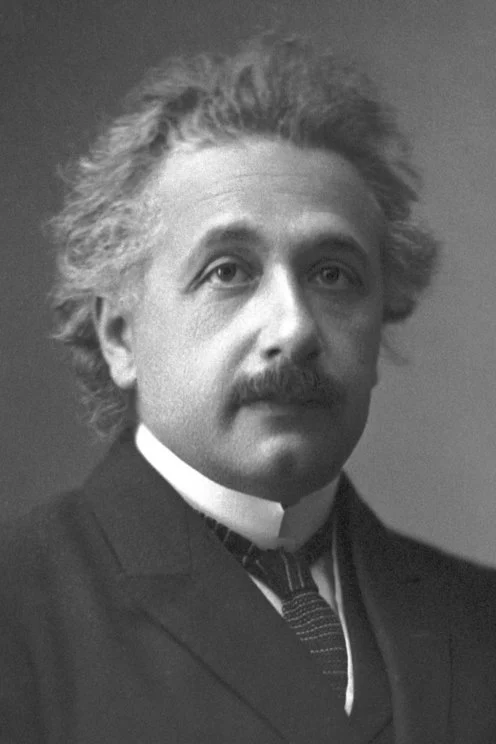

In [7]:
image0

In [8]:
example_prompt="A photo of Einstein as a chef, wearing an apron, cooking in a French restaurant"
example_negative_prompt="lowres, bad anatomy, worst quality, low quality"

In [ ]:
image = pipeline(
    prompt=example_prompt,
    ip_adapter_image=image0,
    negative_prompt=example_negative_prompt,
    num_inference_steps=100,
    # height, width optional
    #height=600,
    #width=400
).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

To use IP-Adapter FaceID models, first extract face embeddings with `insightface`.

In [14]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

In [16]:
%time
from insightface.app import FaceAnalysis

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations
INFO:matplotlib.font_manager:generated new fontManager


In [17]:
pipeline = StableDiffusionPipeline.from_pretrained(example_model_subdir)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  text_encoder
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  unet
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  feature_extractor
{}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  tokenizer
{}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  vae
{'torch_dtype': None, 'device_map': None, 'max_memory': None, 'offload_folder': None, 'offload_state_dict': False, 'variant': None, 'low_cpu_mem_usage': True}
cached_folder:  /Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
name:  scheduler
{}
cached_fo

In [19]:
example_ip_adapter_subdir = data_sub_dirs.ModelsDiffusion / "h94" / "IP-Adapter-FaceID"

In [21]:
pipeline.load_ip_adapter(
    example_ip_adapter_subdir,
    subfolder=None,
    weight_name="ip-adapter-faceid_sd15.bin",
    image_encoder_folder=None)

image_encoder is not loaded since `image_encoder_folder=None` passed. You will not be able to use `ip_adapter_image` when calling the pipeline with IP-Adapter.Use `ip_adapter_image_embeds` to pass pre-generated image embedding instead.


KeyError: 'latents'